# ETL Notebook
## 1. Data Extraction
The data was retrieved from UCI machine learning reporsitory and loaded on IBM cloud opbject storage. The link is given below.
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
The schema definition from UCI repository is given below:

AT = Atmospheric Temperature in C
 V = Exhaust Vacuum Pressure
AP = Atmospheric Pressure
RH = Relative Humidity
PE = Power Output. This is the value we are trying to forecast from the parameters given above.

In [37]:
# The code was removed by Watson Studio for sharing.

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [2]:
df.shape

(9568, 5)

## 2. Data Transformation

Change the column names to be more representative for the data for enviornmental conditions.

In [38]:
df.rename(columns={'AT': 'AtmTemperature', 'V': 'ExhaustV', 'AP': 'AtmPressure', 'RH': 'RelHumidity', 'PE': 'PowerOut'}, inplace=True)
df.head()

,AtmTemperature,ExhaustV,AtmPressure,RelHumidity,PowerOut
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Remove the "NaN" or non-existent values colums. Forst check the number of "NaN" values in each column

In [7]:
print("Number of null values for the column temperature :", df['AtmTemperature'].isnull().sum())
print("Number of null values for the column exhaust_vacuum :", df['ExhaustV'].isnull().sum())
print("Number of null values for the column ambient_pressure :", df['AtmPressure'].isnull().sum())
print("Number of null values for the column relative_humidity :", df['RelHumidity'].isnull().sum())
print("Number of null values for the column energy_output :", df['PowerOut'].isnull().sum())

Number of null values for the column temperature : 0
Number of null values for the column exhaust_vacuum : 0
Number of null values for the column ambient_pressure : 0
Number of null values for the column relative_humidity : 0
Number of null values for the column energy_output : 0


Since total number of null values is zero in each column, the removal of non-existent values is not required.
Now, split the data frame to train and test data frames.

Now, check if there are any zero and null values in any of the columns

In [2]:
df.eq(0).any().any()

False

In [ ]:
The result shows that there are no "zero" values in the data set.

Find out if there are any values of relative humidity greater than 100 because relative values can not be greater than hundred generally.

In [12]:
RHgreaterthan100 = df['RelHumidity'] > 100

# Count all where relative humidity is greater than 100
df[RHgreaterthan100].shape

(55, 5)

## Relative Humidity values > 100%
    Since humidity is given as a percent relative humidity. A check was made if there are any values more than 100% present in the dataset. 55 values were found to be more than 100 %. Before the removal of the 55 records containing relative humidity greater than 100 percent, it was considered prudent to check if relative humidity can exceed 100 %. Relative humidity is defined as “the amount of water vapor present in air expressed as a percentage of the amount needed for saturation at the same temperature”. At any given temperature and air pressure, a specific maximum amount of water vapor in the air will produce a relative humidity of 100 percent. Supersaturated air literally contains more water vapor than is needed to cause saturation and can have relative humidity of more than 100%. Therefore, relative humidity values of greater than 100% were not removed.

## Z-Score Method to remove the outliers

In [39]:
from scipy import stats
import numpy as np
z = stats.zscore(df)
print(z)

[[-0.62951938 -0.98729659  1.8204884  -0.00951935  0.52120807]
 [ 0.74190911  0.68104512  1.1418628  -0.97462052 -0.58566442]
 [-1.95129733 -1.17301765 -0.18507756  1.2898397   2.00367889]
 ...
 [ 1.56583973  1.57581141 -0.05709854 -2.52261812 -1.45288056]
 [ 0.64797565  1.19177803  0.1011913  -0.74790051 -1.09134518]
 [ 0.26150656  0.64641916  0.66867722 -0.37254534 -0.06357687]]


In [72]:
df1 = df[((z < 3) & (z > -3)).all(axis=1)]

In [73]:
df1.shape

(9510, 5)

[Text(0, 0.5, 'AtmPressure')]

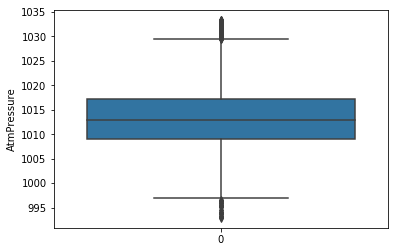

In [25]:
import seaborn as sns
ax1 = sns.boxplot(data=df['AtmPressure'])
ax1.set(ylabel='AtmPressure')

[Text(0, 0.5, 'RelHumidity')]

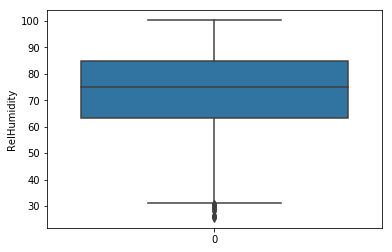

In [26]:
ax2 = sns.boxplot(data=df['RelHumidity'])
ax2.set(ylabel='RelHumidity')

[Text(0, 0.5, 'AtmPressure')]

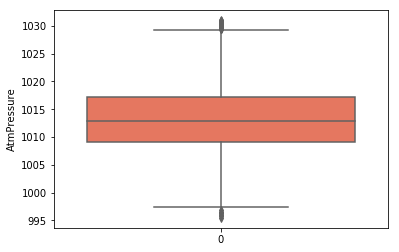

In [79]:
import matplotlib.pyplot as plt
ax3 = sns.boxplot(data=df1['AtmPressure'], palette="Reds")
ax3.set(ylabel='AtmPressure')

[Text(0, 0.5, 'RelHumidity')]

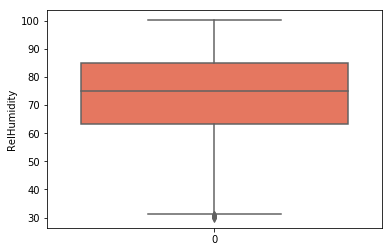

In [80]:
ax4 = sns.boxplot(data=df1['RelHumidity'], palette="Reds")
ax4.set(ylabel='RelHumidity')

From the box plots above, it can be concluded that Z-score method has removed outliers from Relative humidity considerably but not from Atmospheric Pressure column.

There are still some outliers present in Atm Pressure as indicated by the box plot above

## IQR-Score Method to remove the outliers

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AtmTemperature    12.2100
ExhaustV          24.8000
AtmPressure        8.1600
RelHumidity       21.5025
PowerOut          28.6800
dtype: float64


In [30]:
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(9468, 5)

[Text(0, 0.5, 'AtmPressure')]

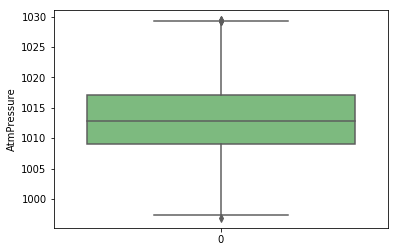

In [83]:
ax5 = sns.boxplot(data=df2['AtmPressure'], palette="Greens")
ax5.set(ylabel='AtmPressure')

[Text(0, 0.5, 'RelHumidity')]

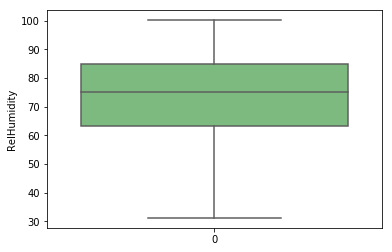

In [84]:
ax6 = sns.boxplot(data=df2['RelHumidity'], palette="Greens")
ax6.set(ylabel='RelHumidity')

From the box plots above, it can be concluded that IQR-score method has removed outliers from Relative humidity completely and considerably from Atmospheric Pressure column. Therefore IQR method is chosen to filter the data from outliers.

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.2)

In [20]:
train.head()

,AtmTemperature,ExhaustV,AtmPressure,RelHumidity,PowerOut
5282,31.71,69.04,1008.79,49.32,441.15
1761,17.80,43.72,1008.71,78.50,458.92
1748,24.77,48.92,1010.25,47.04,448.25
819,30.55,70.04,1010.51,49.37,429.56
166,18.14,49.78,1002.95,100.09,451.44


In [21]:
test.head()

,AtmTemperature,ExhaustV,AtmPressure,RelHumidity,PowerOut
7908,27.24,77.17,1009.37,81.51,439.12
4672,32.38,77.24,1007.70,61.15,430.96
1376,23.56,42.67,1008.01,66.76,440.69
6241,13.94,44.84,1023.69,95.30,468.06
7436,10.33,40.60,1015.00,88.62,478.30


## 3. Data Loading

Now, load test and train data to Spark for data modeling and evaluation

In [22]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [23]:
trainspark_df = sqlContext.createDataFrame(train)
testspark_df = sqlContext.createDataFrame(test)

In [25]:
trainspark_df.show(5)

+--------------+--------+-----------+-----------+--------+
|AtmTemperature|ExhaustV|AtmPressure|RelHumidity|PowerOut|
+--------------+--------+-----------+-----------+--------+
|         31.71|   69.04|    1008.79|      49.32|  441.15|
|          17.8|   43.72|    1008.71|       78.5|  458.92|
|         24.77|   48.92|    1010.25|      47.04|  448.25|
|         30.55|   70.04|    1010.51|      49.37|  429.56|
|         18.14|   49.78|    1002.95|     100.09|  451.44|
+--------------+--------+-----------+-----------+--------+
only showing top 5 rows



In [24]:
testspark_df.show(5)

+--------------+--------+-----------+-----------+--------+
|AtmTemperature|ExhaustV|AtmPressure|RelHumidity|PowerOut|
+--------------+--------+-----------+-----------+--------+
|         27.24|   77.17|    1009.37|      81.51|  439.12|
|         32.38|   77.24|     1007.7|      61.15|  430.96|
|         23.56|   42.67|    1008.01|      66.76|  440.69|
|         13.94|   44.84|    1023.69|       95.3|  468.06|
|         10.33|    40.6|     1015.0|      88.62|   478.3|
+--------------+--------+-----------+-----------+--------+
only showing top 5 rows

